## Name: Nhat Tran (1000787456)
### Date: Nov 15
### Assignment 05

In [1]:
import os
import numpy as np
from scipy import misc

def cifar_data(size='1000', dataset='train', dir_path='.', vectorize_label=True):
    path = ''
    if size == '1000':
        path = dir_path + '/cifar_data_1000_100/'
        if dataset == 'train':
            path = path + 'train/'
        elif dataset == 'test':
            path = path + 'test/'
    elif size == '100':
        path = dir_path + '/cifar_data_100_10/'
        if dataset == 'train':
            path = path + 'train/'
        elif dataset == 'test':
            path = path + 'test/'

    files_list = os.listdir(path)
    n_samples = len(files_list)
    X = np.ndarray((n_samples, 3072))
    if vectorize_label:
        y = np.ndarray((n_samples, 10))
    else:
        y = np.ndarray((n_samples, ), dtype=int)

    for i in range(n_samples):
        class_label = files_list[i].split('_')[0]
        img_arr = np.asarray(misc.imread(path + files_list[i])).ravel()
        X[i] = img_arr
        if vectorize_label:
            y[i] = np.eye(10)[int(class_label)]
        else:
            y[i] = int(class_label)

    return X, y

## Task 1

(1000, 3072) (1000, 10)
(100, 3072) (100,)


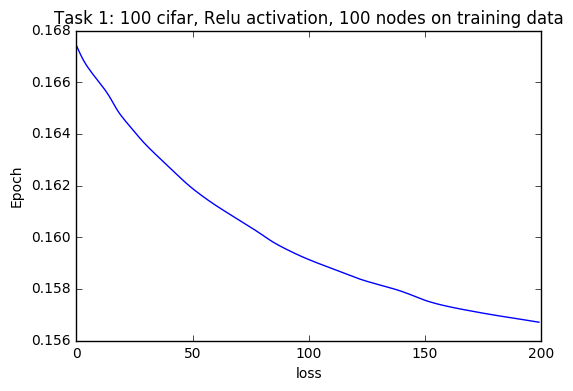

In [9]:
from Projects.Kamangar_NeuralNet.Tran_assignment_05.neural_net import NeuralNet
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt

trainX, trainY = cifar_data(size='100', dataset='train', dir_path='.')
testX, testY = cifar_data(size='100', dataset='test', dir_path='.', vectorize_label=False)

scaler = preprocessing.StandardScaler().fit(trainX)
trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)
print trainX.shape, trainY.shape
print testX.shape, testY.shape

nnet = NeuralNet(n_inputs=3072, n_classes=10, n_hidden_nodes=100, alpha=0., n_epoch=200, activation='relu')
nnet.train(trainX, trainY, batch_size=trainX.shape[0])

plt.title('Task 1: 100 cifar, Relu activation, 100 nodes on training data')
plt.xlabel('loss')
plt.ylabel('Epoch')
plt.plot(nnet.losses_)
plt.show()

In [10]:
print "Confusion Matrix"
print metrics.confusion_matrix(testY, nnet.predict(testX), labels=range(0, 10))

Confusion Matrix
[[4 0 0 1 0 1 0 0 3 1]
 [1 0 0 2 0 3 0 0 1 3]
 [1 0 0 2 0 4 0 0 1 2]
 [3 1 0 2 0 2 1 0 1 0]
 [3 0 0 3 0 3 0 0 0 1]
 [0 0 0 0 0 7 0 0 2 1]
 [1 0 0 1 0 0 3 3 2 0]
 [1 0 0 2 1 2 0 0 1 3]
 [0 0 0 0 0 0 0 0 3 7]
 [0 0 1 2 0 0 0 1 4 2]]


## Task 2

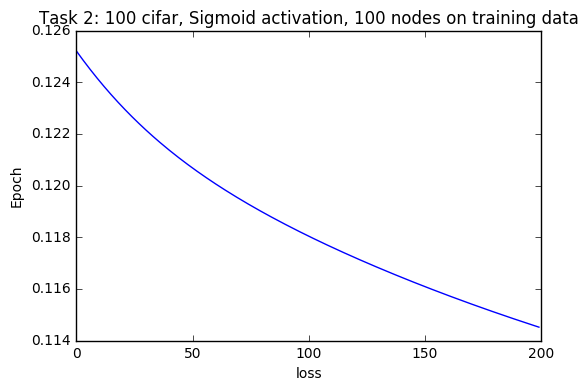

In [12]:
nnet = NeuralNet(n_inputs=3072, n_classes=10, n_hidden_nodes=100, alpha=0., n_epoch=200, activation='sigmoid')
nnet.train(trainX, trainY, batch_size=trainX.shape[0])

plt.title('Task 2: 100 cifar, Sigmoid activation, 100 nodes on training data')
plt.xlabel('loss')
plt.ylabel('Epoch')
plt.plot(nnet.losses_)
plt.show()

In [14]:
print "Confusion Matrix"
print metrics.confusion_matrix(testY, nnet.predict(testX), labels=range(0, 10))

Confusion Matrix
[[0 0 0 3 0 5 0 0 0 2]
 [1 0 0 2 2 0 0 0 0 5]
 [0 0 0 1 0 4 0 1 0 4]
 [1 1 0 2 1 2 0 2 0 1]
 [0 0 0 0 3 5 0 2 0 0]
 [1 0 0 1 0 4 0 2 0 2]
 [0 1 0 1 0 3 0 4 0 1]
 [0 0 0 2 1 1 0 2 0 4]
 [0 0 0 0 0 4 0 0 0 6]
 [1 0 0 1 0 2 0 1 0 5]]


## Task 3

In [ ]:
for n_hidden_nodes in [100, 200, 300, 400, 500]:
    nnet = NeuralNet(n_inputs=3072, n_classes=10, n_hidden_nodes=n_hidden_nodes, alpha=0., n_epoch=200, activation='sigmoid')
    nnet.train(trainX, trainY, batch_size=trainX.shape[0])

    plt.plot(nnet.losses_, label='Hidden Nodes: {}'.format(n_hidden_nodes))

plt.title('Task 2: 100 cifar, Sigmoid activation, 100 nodes on training data')
plt.xlabel('loss')
plt.ylabel('Epoch')
plt.show()